# Exercise 1 Q&A

## Question on Ilias

## Why does the Xi2 test not work with continuous data?

### Reasoning behind Xi2

Tests if P(X,Y) != P(X)P(Y) with high probability

1. Each cell in contingency table approximately follows normal distribution
    - due to the central limit theorem (https://en.wikipedia.org/wiki/Central_limit_theorem)
    - skew of binomial distribution is small for large enough number of samples
        - normal approximation of binomial distribution
2. Standard-normalize entry in cell
3. Sum of standard-normally distributed random variables is Xi2-distributed

### Problem with continuous data: 
The central limit theorem requires large enough numbers of samples in each cell.
- but the contingency table will be sparse
- In  the continuous case, n=1 for each cell in the contingency matrix
- Therefore, the CLT does not hold!

#### Let us try it out with some correlated data

In [1]:
import numpy as np
seed = 0
rng = np.random.default_rng(seed)

sample_size = 100
sample1 = np.linspace(0, 1, sample_size) + rng.normal(scale=0.2, size=sample_size)
sample2 = np.linspace(0, 1, sample_size) + rng.normal(scale=0.2, size=sample_size)

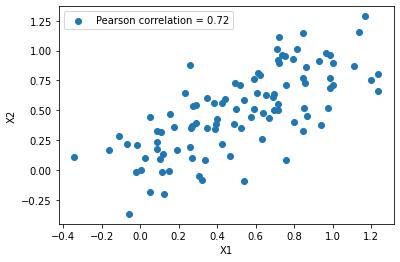

In [2]:
from scipy.stats import pearsonr
pearson_correlation = pearsonr(sample1, sample2)[0]

import matplotlib.pyplot as plt
plt.scatter(sample1, sample2, label=f"Pearson correlation = {round(pearson_correlation, 2)}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [3]:
import pandas as pd
dataframe = pd.DataFrame()
dataframe["X1"] = sample1
dataframe["X2"] = sample2
dataframe.head()

,X1,X2
0,0.025146,0.100537
1,-0.016320,0.208044
2,0.148287,-0.012657
3,0.051283,-0.184570
4,-0.066730,0.215012


In [4]:
contingency_continuous = pd.crosstab(dataframe.X1, dataframe.X2)
contingency_continuous

X2,-0.369220,-0.205574,-0.184570,-0.089222,-0.082008,-0.053032,-0.021922,-0.015318,-0.012657,-0.000159,...,0.950907,0.959180,0.962554,0.983549,1.009760,1.016337,1.117267,1.146659,1.156584,1.288246
X1,,,,,,,,,,,,,,,,,,,,,
-0.343794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.162175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.107768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.066730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.059939,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.137700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1.165887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.198458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import scipy.stats as scs
chi2_result = scs.chi2_contingency(contingency_continuous)
p_value = chi2_result[1]
f"p = {round(p_value, 2)}"

'p = 0.24'

In [6]:
dataframe_discrete = dataframe.copy()
dataframe_discrete.X1 = pd.cut(dataframe.X1, bins=5)
dataframe_discrete.X2 = pd.cut(dataframe.X2, bins=5)
dataframe_discrete.head()

,X1,X2
0,"(-0.0277, 0.288]","(-0.0377, 0.294]"
1,"(-0.0277, 0.288]","(-0.0377, 0.294]"
2,"(-0.0277, 0.288]","(-0.0377, 0.294]"
3,"(-0.0277, 0.288]","(-0.371, -0.0377]"
4,"(-0.345, -0.0277]","(-0.0377, 0.294]"


In [7]:
contingency_discrete = pd.crosstab(dataframe_discrete.X1, dataframe_discrete.X2)
contingency_discrete

X2,"(-0.371, -0.0377]","(-0.0377, 0.294]","(0.294, 0.625]","(0.625, 0.957]","(0.957, 1.288]"
X1,,,,,
"(-0.345, -0.0277]",1,4,0,0,0
"(-0.0277, 0.288]",2,13,9,2,0
"(0.288, 0.605]",3,3,15,3,0
"(0.605, 0.921]",0,2,10,13,5
"(0.921, 1.237]",0,0,2,9,4


In [8]:
chi2_result = scs.chi2_contingency(contingency_discrete)
chi2_result
p_value = chi2_result[1]
f"p = {p_value}"

'p = 3.096837853814757e-08'

Therefore, we can reject our null hypothesis

## Additional

## Why is truncated mean an algebraic aggregate?

- This is a bit tricky and confusing in my opinion
- One must be careful with the defininition of the truncated mean (https://en.wikipedia.org/wiki/Truncated_mean)
    - Either: we truncate a fixed number of points
    - Or: we truncate a certain percentage
        - In this case, we must first compute the absolute number of points to truncate
        - Afterwards, we can proceed as normal
    

#### Basic process
- We are given some data
- We distribute the data to different nodes
- Each node computes the truncated average and returns triple (mean, count, truncated points)
- In the aggregation step:
    1. compute truncated average (and corresponding count) over all truncated points
        - add this average to the other intermediate results
    2. compute weighted average over all intermediate results
    
    
#### Programming example

First, let us create some random data and "distribute" it across different nodes

In [9]:
n_truncate = 10
n_nodes = 10
n_per_node = 100
all_data = rng.uniform(size=n_nodes * n_per_node)

# create n_nodes partitions that we could (in principle) distribute to different computing nodes
partitioned_data = np.reshape(all_data, (n_nodes, n_per_node))

all_data.shape, partitioned_data.shape

((1000,), (10, 100))

The partitioned data now looks something like this:
- keep in mind that we only show the first three out of 100 entries here!

In [10]:
partitioned_data[:, :3]

array([[0.1951074 , 0.57768789, 0.60223918],
       [0.71148682, 0.56902585, 0.82595722],
       [0.00489941, 0.3229208 , 0.99074472],
       [0.26186402, 0.01210142, 0.48300841],
       [0.65690145, 0.687415  , 0.58626421],
       [0.39847844, 0.49900931, 0.1988258 ],
       [0.68791452, 0.758999  , 0.07538874],
       [0.33655896, 0.76431977, 0.76372546],
       [0.43591807, 0.60179472, 0.8500282 ],
       [0.14160234, 0.8009724 , 0.24391029]])

For each node, we compute truncated mean, counts and also store the truncated points

In [11]:
truncmeans_intermediate = []
counts_intermediate = []
truncated_points = []

for node_data in partitioned_data:
    sorted_data = np.sort(node_data)
    
    remaining_data, truncated = sorted_data[:-n_truncate], sorted_data[-n_truncate:]
    trunc_mean = np.mean(remaining_data)
    count = len(remaining_data)
    
    truncmeans_intermediate.append(trunc_mean)
    counts_intermediate.append(count)
    truncated_points += list(truncated)

Afterwards, we compute the truncated mean of all truncated points

In [12]:
truncated_points = np.sort(truncated_points)[:-n_truncate]
additional_trunc_mean = np.mean(truncated_points)
additional_count = len(truncated_points)

truncmeans_intermediate.append(additional_trunc_mean)
counts_intermediate.append(additional_count)

Now we only have to compute the weighted average of the data below

In [13]:
truncmeans_intermediate, counts_intermediate

([0.4987772779878072,
  0.4497740341750425,
  0.4915162422138837,
  0.44478331226701734,
  0.4185617735812547,
  0.4695908501956894,
  0.4834522904678587,
  0.4567492134972644,
  0.4157449331631669,
  0.4593182467372228,
  0.9280637333468895],
 [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90])

In [14]:
def weighted_average(values, weights) -> float:
    weighted_sum = 0
    for val, weight in zip(values, weights):
        weighted_sum += weight * val
    total_weight = sum(weights)
    return weighted_sum / total_weight

wa = weighted_average(truncmeans_intermediate, counts_intermediate)
wa.round(4)

0.5015

In [15]:
all_data_sorted = np.sort(all_data)
truncated_data = all_data_sorted[:-n_truncate]
np.mean(truncated_data).round(4)

0.5015

## KS and Wilcoxon-Mann-Whitney (MWU) Test

### KS Test

#### How do we construct cumulative distribution function?
- sort the data
    - assume that data has n_points points

In [16]:
n_points = 100
random_data = rng.normal(size=n_points)
sorted_data = np.sort(random_data)

- for each value in data
    - go 1/n_points up

In [17]:
y_empirical_cdf = np.linspace(1.0 / n_points, 1, n_points)
y_empirical_cdf

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

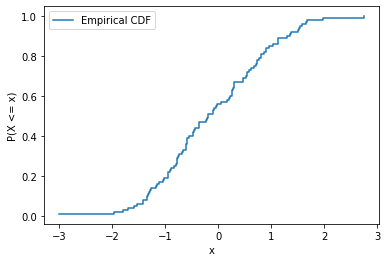

In [18]:
import seaborn as sns
sns.lineplot(x=sorted_data, y=y_empirical_cdf, label="Empirical CDF", drawstyle='steps-post')
plt.xlabel("x")
plt.ylabel("P(X <= x)")
plt.legend()
plt.show()

Now let us compare this to the CDF of the standard normal distribution

In [19]:
from scipy.stats import norm

min_sample = min(random_data)
max_sample = max(random_data)
x_true_cdf = np.linspace(min_sample, max_sample, 1000)

# Standard normal
y_true_cdf = norm.cdf(x_true_cdf, loc=0, scale=1)

# Normal distribution with standard deviation of 0.5
y_true_cdf_low_variance = norm.cdf(x_true_cdf, loc=0, scale=0.5)

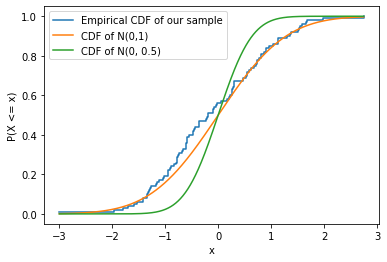

In [20]:
import seaborn as sns
sns.lineplot(x=sorted_data, y=y_empirical_cdf, label="Empirical CDF of our sample", drawstyle='steps-post')
sns.lineplot(x=x_true_cdf, y=y_true_cdf, label="CDF of N(0,1)")
sns.lineplot(x=x_true_cdf, y=y_true_cdf_low_variance, label="CDF of N(0, 0.5)")
plt.xlabel("x")
plt.ylabel("P(X <= x)")
plt.legend()
plt.show()

The above could be the basis for a 1-sample KS test
- Null hypothesis: sample follows standard normal distribution)

We can use the 2-sample KS test to compare two samples    
- Null hypothesis: the two samples follow the same distribution

### MWU Test

- Compute U1, U2 for two samples X1, X2.
    - U = rank sum - n(n+1)/2
- Define U_min = min(U1, U2)
- Look up in table if U_min is still acceptable

#### What does the U-statistic really mean?

- U = rank sum - n(n+1)/2
- Does n(n+1)/2 seem familiar to you?
    - Hint: Assume you have two samples X1, X2 where max(X1) < min(X2)
        - What will be U_min?

#### Let us try it out!

First, we create some data s.th. max(X1) < min(X2)

In [21]:
n_samples = 20
X1 = rng.uniform(0, 0.5, n_samples)
X2 = rng.uniform(0.5, 1, n_samples)
max(X1), min(X2)

(0.44156727217099334, 0.5022044331612215)

We now create a dataframe that contains
- the samples ("values")
- an indicator if the sample belongs to X1 or X2

In [22]:
df_sample1 = pd.DataFrame()
df_sample1["value"] = X1
df_sample1["sample"] = "X1"

df_sample2 = pd.DataFrame()
df_sample2["value"] = X2
df_sample2["sample"] = "X2"

df_both_samples = pd.concat([df_sample1, df_sample2], ignore_index=True)
df_both_samples.sample(frac=1).head()

,value,sample
32,0.698178,X2
34,0.757092,X2
1,0.229293,X1
27,0.813005,X2
31,0.968491,X2


In [23]:
df_both_samples = df_both_samples.sort_values(by="value")
df_both_samples["rank"] = np.arange(len(df_both_samples)) + 1

df_both_samples

,value,sample,rank
3,0.001867,X1,1
15,0.026061,X1,2
0,0.040710,X1,3
17,0.041660,X1,4
14,0.044061,X1,5
19,0.062460,X1,6
18,0.075316,X1,7
16,0.111352,X1,8
13,0.118793,X1,9
10,0.149833,X1,10


In [24]:
def U_statistic(ranks: pd.Series) -> float:
    rank_sum = np.sum(ranks)
    n = len(ranks)
    U = rank_sum - n * (n + 1) / 2
    return U

In [25]:
U_values = {}
for sample_id, sample_df in df_both_samples.groupby("sample"):
    U = U_statistic(sample_df["rank"])
    U_values[sample_id] = U
    
U_values

{'X1': 0.0, 'X2': 400.0}

**The quantity n(n+1)/2 is the minimum rank sum that we can observe!**
- 1 + 2 + 3 ... + n